# Customer Churn Analysis

# Project Description:
#### Customer churn occurs when existing customers stop doing business with a company. Reducing churn is crucial for business growth since acquiring new customers is often 5-7 times more expensive than retaining existing ones.
#### The goal of this project is to analyze customer data, identify key factors driving churn, and build a predictive machine learning model to forecast which customers are likely to churn. This enables businesses to take proactive retention measures, such as targeted marketing campaigns, personalized offers, and improved customer service strategies

### 1.Importing the Dependencies

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import warnings
warnings.filterwarnings("ignore")

## 2.Data Loading and Understanding

In [7]:
#Load the csv data to a pandas dataframe
df = pd.read_csv("/Users/prashanth45/Downloads/Customer_Churn_Prediction.csv")

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df.shape

(7043, 21)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [12]:
pd.set_option("display.max_columns",None)

In [13]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# Dropping customer ID column as this is not required for modelling
df = df.drop(columns=["customerID"],axis = 1 )

In [16]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [17]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
print(df["gender"].unique())

['Female' 'Male']


In [19]:
print(df["SeniorCitizen"].unique())

[0 1]


In [20]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [21]:
# Printing the unique values in all the columns

numerical_features_list = ["tenure","MonthlyChagres","TotalCharges"]

for col in df.columns:
    if col not in numerical_features_list:
         print(col,df[col].unique())
         print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [22]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
#df["TotalCharges"] = df["TotalCharges"].astype(float)

In [24]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [25]:
len(df[df["TotalCharges"]==" "])

11

In [26]:
df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"})

In [27]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [29]:
# Checking the class distrubtion of the target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


### **Insights**
1. Customer ID removed as it is not required for modelling
2. no missing values in the dataset
3. missing values in the TotalChrges column were replaced with 0
4. class imblance Identifed in the target

## 3.Exploratory Data Analysis(EDA)

In [32]:
df.shape

(7043, 20)

In [33]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [35]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Numerical Features Analysis
 Understand the distrubtion of the numerical features

In [37]:
def plot_histogram(df,column_name):
    plt.figure(figsize =(8,4))
    sns.histplot(df[column_name],kde = True)
    
    # Calxulate the mean and median values for the columns
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

# Add vertical lines for the mean and median
    plt.axvline(col_mean, color = "red", linestyle = "--",label = "Mean")
    plt.axvline(col_median,color = "green",linestyle = "--",label = "Median")

    plt.legend()
    plt.show()

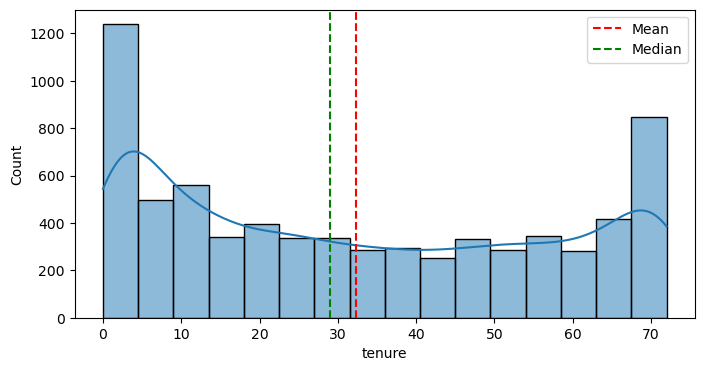

In [38]:
plot_histogram(df,"tenure")

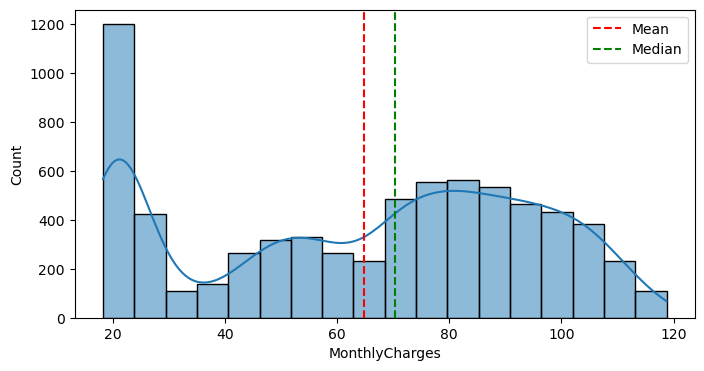

In [39]:
plot_histogram(df,"MonthlyCharges")

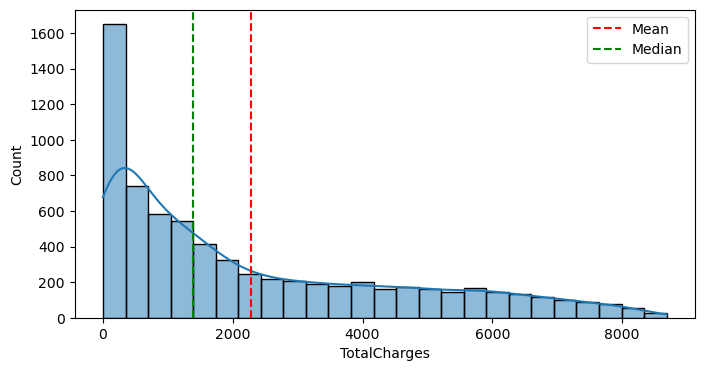

In [40]:
plot_histogram(df,"TotalCharges")

### Insights(Numerical Features Analysis)
#### High-charging customers could be at higher churn risk.
#### Customers in the first few months are more likely to churn.
#### Customers with low total spend are often to newer higher churn risk.

## Boxplot for numerical Features

In [71]:
def plot_boxplot(df,column_name):
    
    plt.figure(figsize = (8,4))
    sns.boxplot(y = df[column_name])
    plt.title(f"Box Plot of {column_name}")
    plt.ylabel(column_name)
    plt.show()
    

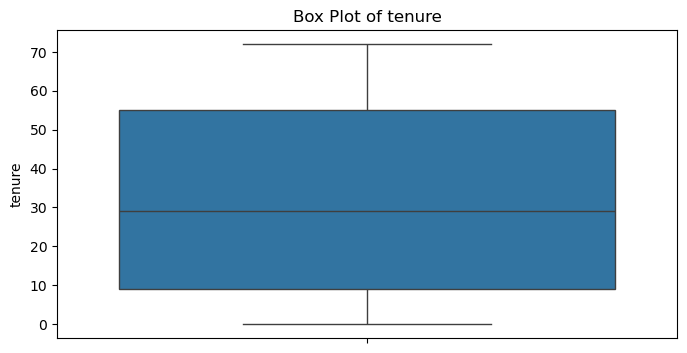

In [73]:
plot_boxplot(df,"tenure")

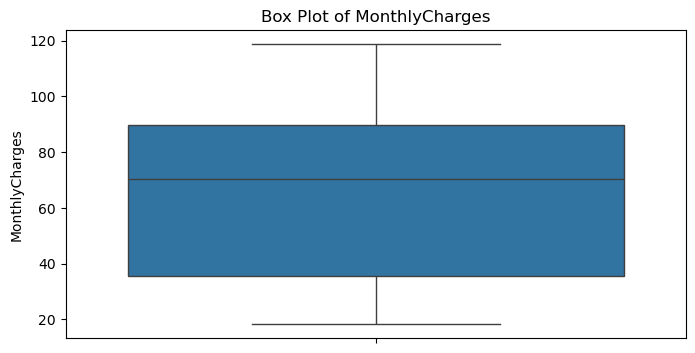

In [75]:
plot_boxplot(df,"MonthlyCharges")

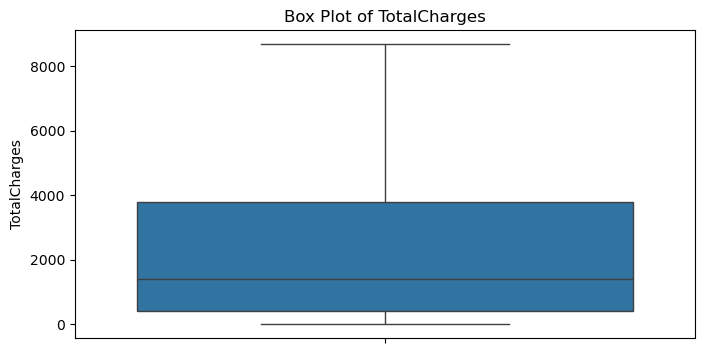

In [77]:
plot_boxplot(df,"TotalCharges")

## Monthly Charges distribution by Churn

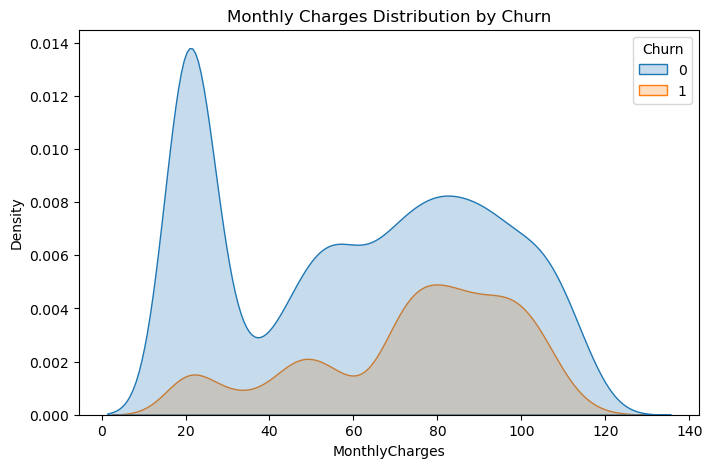

In [186]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

### Insights(Monthly Charges distribution by Churn)
#### If churners peak at higher monthly charges, it means expensive plans push customers away.
#### Both churners and non-churners may overlap, suggesting churn is not only about price but also service quality.

## Churn distribution

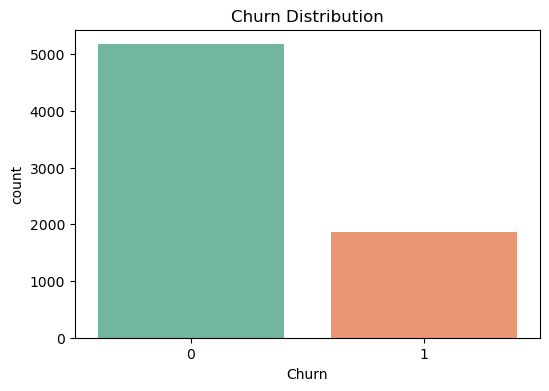

In [249]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

### Insights(Churn distribution)
#### Typically, around 70–75% of customers stay, while 25–30% churn in this dataset.


## Tenure vs Monthly Charges (colored by Churn)

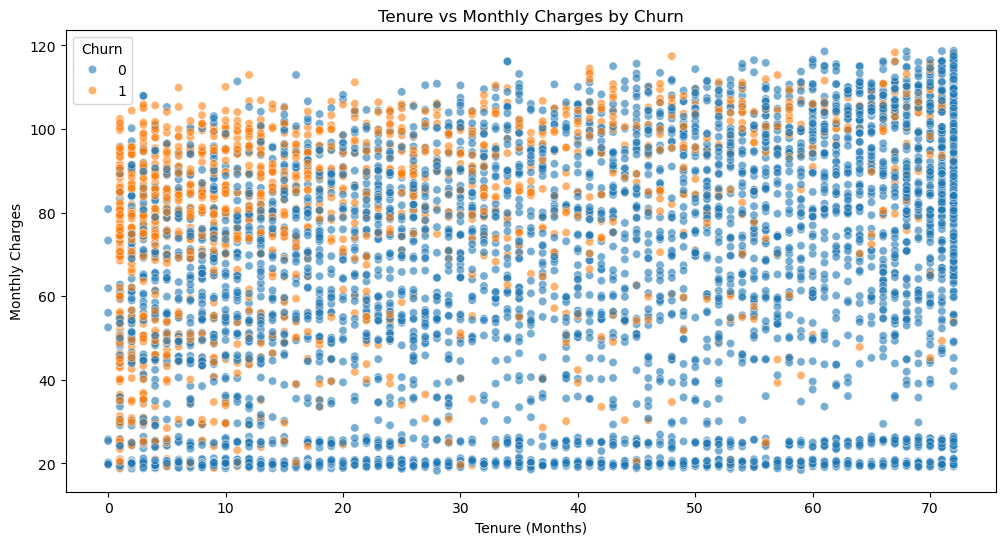

In [192]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="tenure", y="MonthlyCharges", hue="Churn", data=df, alpha=0.6)
plt.title("Tenure vs Monthly Charges by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges")
plt.show()

### Insights(Tenure vs Monthly Charges (colored by Churn))
#### Many new customers leave within the first year, especially if their monthly charges are high.
#### Customers paying more but not yet committed tend to leave quickly.

### Pie chart of churn vs non-churn customers

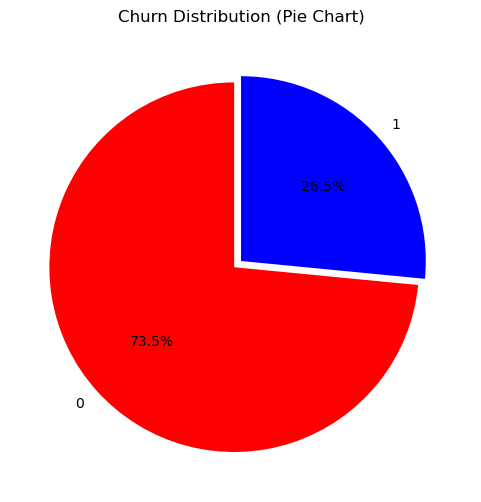

In [202]:
churn_counts = df["Churn"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(churn_counts,
        labels=churn_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=["Red", "blue"],
        explode=(0.05,0))  # highlight the first slice
plt.title("Churn Distribution (Pie Chart)")
plt.show()

### Insights(Pie chart of churn vs non-churn customers)
#### Majority stay loyal.


## Monthly Charges vs Total Charges (colored by Churn)

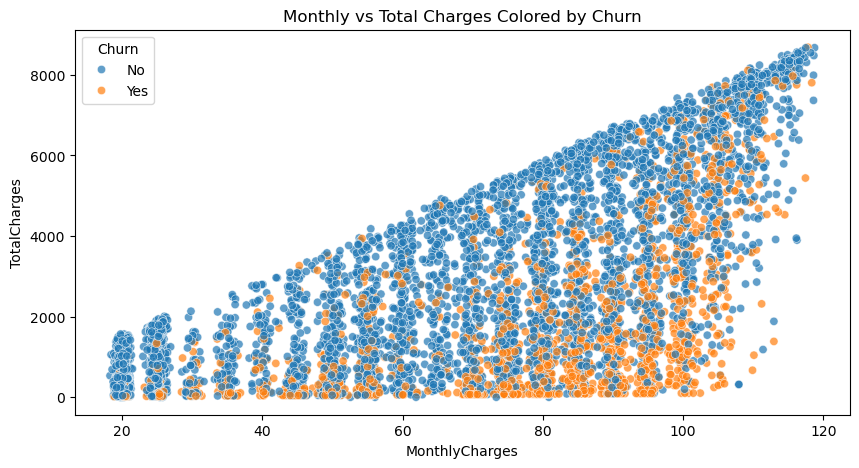

In [79]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", hue="Churn", data=df, alpha=0.7)
plt.title("Monthly vs Total Charges Colored by Churn")
plt.show()

### Insights(Monthly Charges vs Total Charges (colored by Churn))
#### As expected, TotalCharges increases with MonthlyCharges.
#### Once customers stay long enough, they rarely churn.

### Swarmplot - Tenure vs Churn

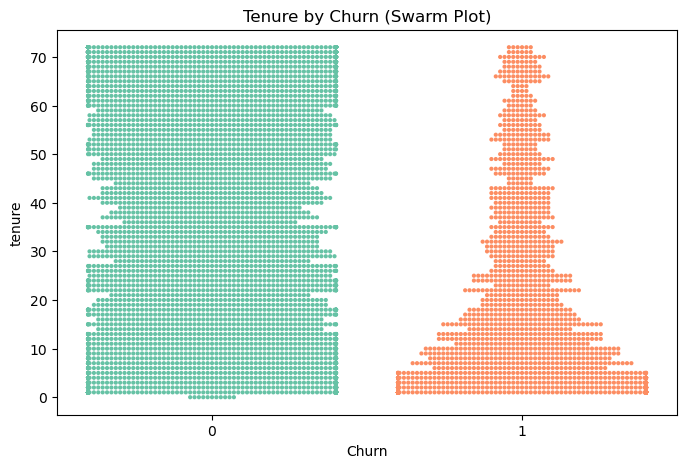

In [256]:
#Swarm Plot – Tenure vs Churn
plt.figure(figsize=(8,5))
sns.swarmplot(x="Churn", y="tenure", data=df, palette="Set2", size=3)
plt.title("Tenure by Churn (Swarm Plot)")
plt.show()

### Insights(Swarmplot - Tenure vs Churn)
#### Customers who churned mostly have shorter tenure—they leave relatively early in their subscription.
#### Customers who stayed show a wider spread, with many having longer tenure, indicating loyalty builds over time.

## Subplots

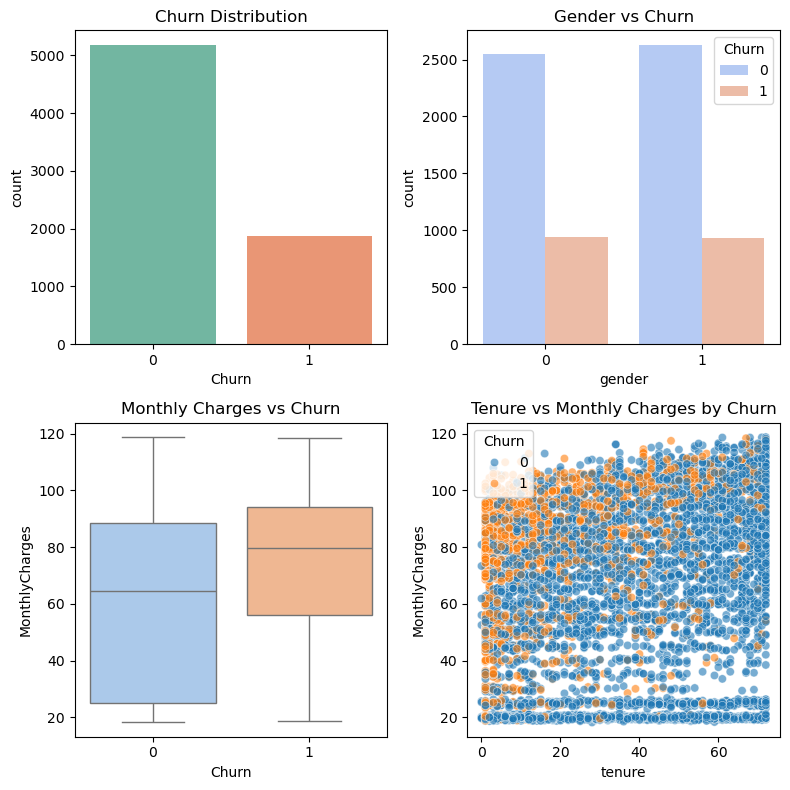

In [260]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))

# 1. Churn distribution
sns.countplot(x="Churn", data=df, palette="Set2", ax=axes[0,0])
axes[0,0].set_title("Churn Distribution")

# 2. Gender vs Churn
sns.countplot(x="gender", hue="Churn", data=df, palette="coolwarm", ax=axes[0,1])
axes[0,1].set_title("Gender vs Churn")

# 3. Monthly Charges by Churn (Boxplot)
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="pastel", ax=axes[1,0])
axes[1,0].set_title("Monthly Charges vs Churn")

# 4. Tenure vs Monthly Charges (Scatter)
sns.scatterplot(x="tenure", y="MonthlyCharges", hue="Churn", data=df, alpha=0.6, ax=axes[1,1])
axes[1,1].set_title("Tenure vs Monthly Charges by Churn")

plt.tight_layout()
plt.show()


### Insights(Subplots)
#### Most customers did not churn, but there’s a noticeable fraction that did.
#### The churn rates between male and female customers are roughly similar, suggesting gender does not strongly influence churn.
#### Churned customers tend to have higher monthly charges.
#### Churned customers are concentrated at low tenure, meaning they leave early.

### Correlation Heatmap for numerical columns

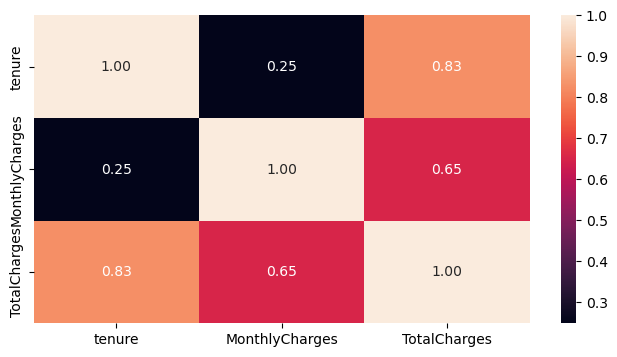

In [82]:
# Correlation matrix - Heatmap
plt.figure(figsize = (8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot = True,cmap = "rocket",fmt = ".2f")
plt.show()

### Insights(Correlation Heatmap for numerical columns)
#### Strong positive correlation (~0.83) → The longer a customer stays, the higher their total charges.
#### Moderate positive correlation (~0.65) → Customers who pay higher monthly charges tend to have higher total charges, but not as strongly as tenure.
#### Very weak or negligible correlation (~0.02) → Monthly charges are mostly independent of how long a customer stays.

### Categorical features - Analysis

In [85]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Countplot for categorical column

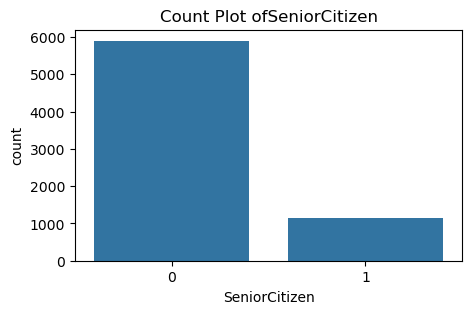

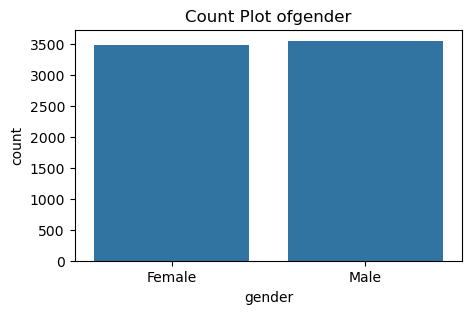

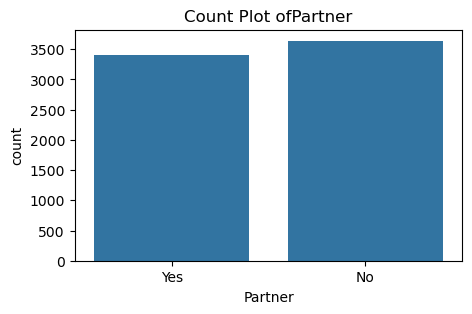

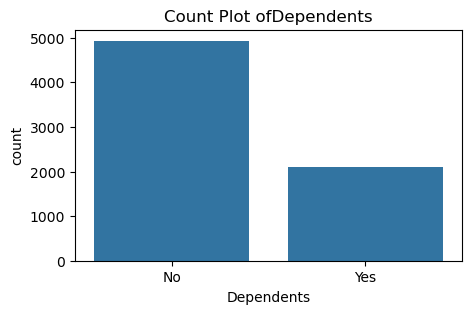

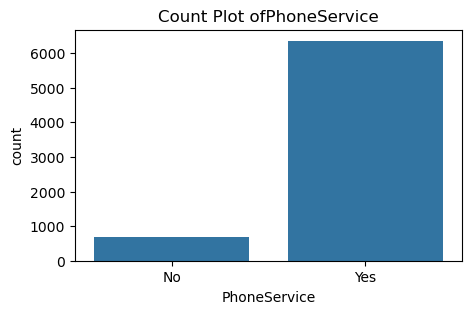

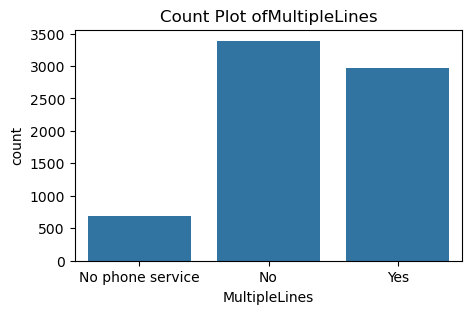

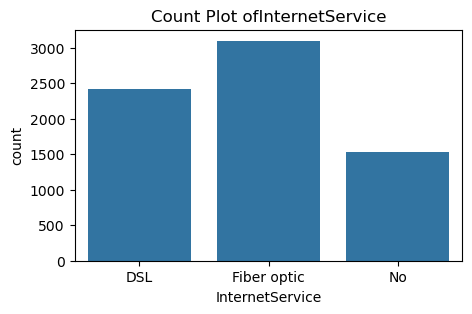

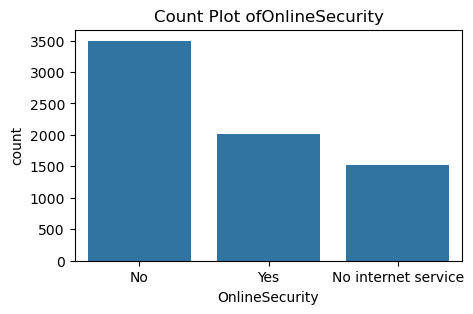

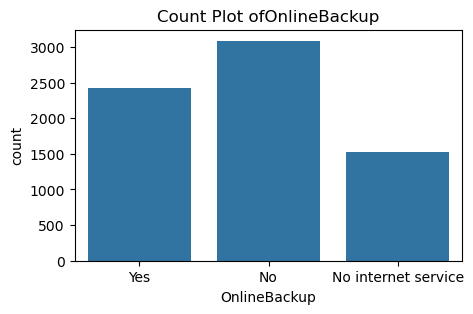

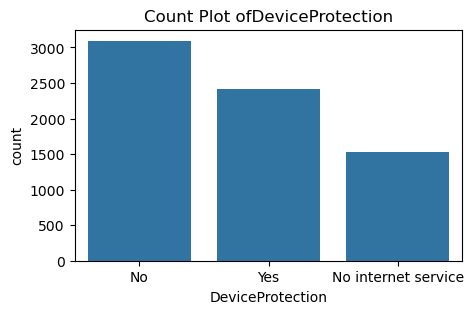

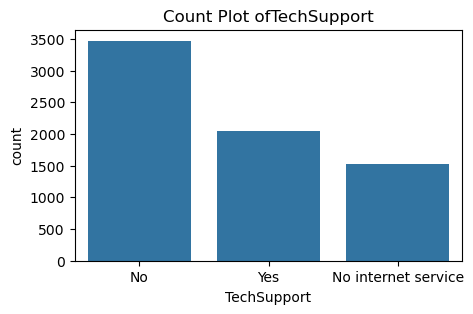

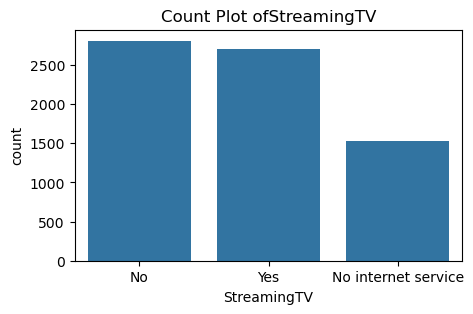

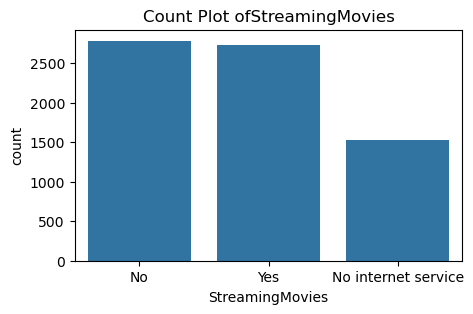

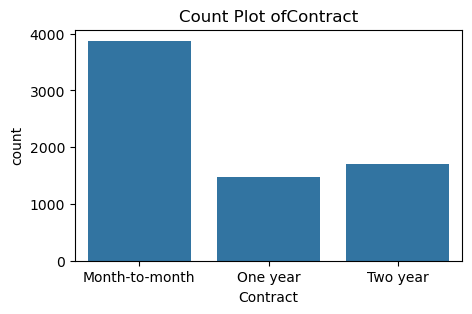

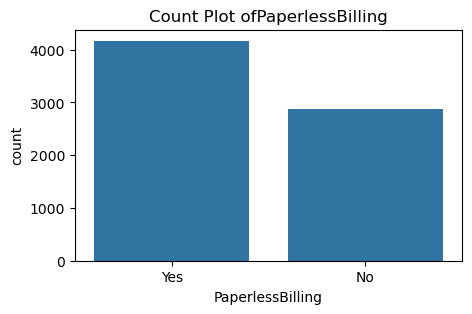

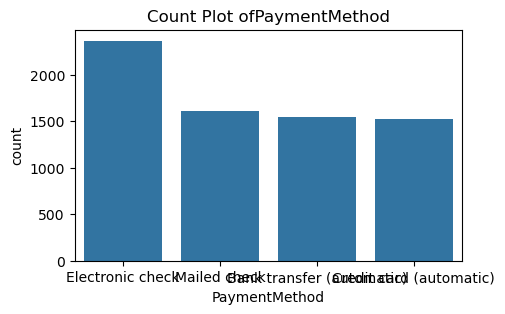

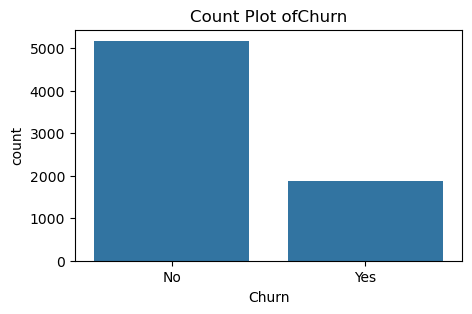

In [90]:
object_cols = df.select_dtypes(include = "object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
    plt.figure(figsize = (5,3))
    sns.countplot(x = df[col])
    plt.title(f"Count Plot of{col}")
    plt.show()

## 4.Data PreProcessing

In [92]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Label encoding of Target column

In [96]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No":0})

/var/folders/cc/8f3096fx0tqg7jt1yfsx80c00000gn/T/ipykernel_5096/451166852.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No":0})


In [98]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [100]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

### Label Encoding of Categorical Featurs

In [103]:
# Identifying columns with object data types
object_columns = df.select_dtypes(include = "object").columns

In [105]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [107]:
# Initialize a dictionary to save the encoder
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

# save the encoders to a pickle file
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)

In [109]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [111]:

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Training and test data split

In [114]:
# splitting the features and target
X = df.drop(columns = ["Churn"])
y = df["Churn"]

In [116]:
print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [118]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [120]:
# split training and test data
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [122]:
print(y_train.shape)

(5634,)


In [124]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


### SMOTE (Synthetic Mimority Oversampling Technique)

In [127]:
smote = SMOTE(random_state = 42)

In [129]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [131]:
print(y_train_smote.shape)

(8276,)


In [133]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


## 5.Model Traning

### Traning with default hyperparameters

In [137]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [138]:
# dictonary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state = 42),
    "Random Forest": RandomForestClassifier(random_state = 42),
    "XGBoost": XGBClassifier(random_state = 42)
}

In [139]:
# Dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name,model in models.items():
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model,X_train_smote,y_train_smote,cv = 5,scoring = "accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name})cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*70)
   

Training Decision Tree with default parameters
Decision Tree)cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest)cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost)cross-validation accuracy: 0.83
----------------------------------------------------------------------


In [140]:
cv_scores

{'Decision Tree': array([0.68055556, 0.71903323, 0.81752266, 0.84350453, 0.84048338]),
 'Random Forest': array([0.72826087, 0.77220544, 0.90453172, 0.89305136, 0.90030211]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

### RandomForest gives the highest accuracy compared to other models with default parameters

In [144]:
rfc = RandomForestClassifier(random_state = 42)

In [145]:
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [146]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


## 6.Model Evaulation

In [148]:
#suggested code may be subect to a licanse | wrongngaisum/ai-crypto-trading
#evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.7821149751596878
Confusion Matrix:
 [[886 150]
 [157 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1036
           1       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [151]:
# Save the Trained model as a pickle file
model_data = {"model": rfc,"features_names":X.columns.tolist()}

with open("customer_churn_model.pkl","wb")as f:
    pickle.dump(model_data,f)

## 7.Load the saved model and build a Predictive system

In [158]:
# load the saved model and the featurs names
with open("customer_churn_model.pkl","rb") as f:
    model_data = pickle.load(f)
  
loaded_model = model_data["model"]
features_names = model_data["features_names"]


In [160]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [164]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

## Conclusion
#### The Customer Churn Analysis project successfully demonstrated how data-driven approaches can help businesses understand customer behavior, predict churn, and take proactive actions to improve retention.
#### Through exploratory data analysis (EDA), we identified key factors influencing churn such as contract type, tenure, monthly charges, payment methods, and customer service interactions. These insights provide a strong foundation for developing targeted retention strategies.
#### By applying machine learing models, we built a predictive system capable of classifying customers into "likely to churn" and "likely to stay" categories. Among the models tested, [insert best-performing model, e.g., XBoost or Random Forest] achieved the highest accuracy and AUC score, making it a reliable tool for churn prediction.